In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [55]:
labeledLoopsFile = '/data2/josh/expCH12/labeled_loops_extra.csv'
labeledLoopsDf = pd.read_csv(labeledLoopsFile, sep="\t")
labeledLoopsDf.head(n=5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chrA,startbpA,endbpA,chrB,startbpB,endbpB,score,tadA,tadB,regA,regB,EP_Status
0,0,0,0,chr1,85270000,85280000,chr1,87480000,87490000,805,ID_0.01_159,ID_0.01_159,P,P,intraN
1,1,1,1,chr11,117100000,117110000,chr11,117210000,117220000,246,ID_0.01_3838,ID_0.01_3838,P,P,intraN
2,2,2,2,chr11,66920000,66930000,chr11,67160000,67170000,233,NaN,ID_0.01_3626,EP,P,tadlessEP
3,3,3,3,chr11,77630000,77640000,chr11,77780000,77790000,222,NaN,ID_0.01_3676,P,P,tadlessN
4,4,4,4,chr11,116180000,116190000,chr11,116300000,116310000,203,ID_0.01_3833,ID_0.01_3833,EP,P,intraEP


In [57]:
numIntraEP = (labeledLoopsDf["EP_Status"]=="intraEP").sum()
numInterEP = (labeledLoopsDf["EP_Status"]=="interEP").sum()
numIntraN = (labeledLoopsDf["EP_Status"]=="intraN").sum()
numInterN = (labeledLoopsDf["EP_Status"]=="interN").sum()
numTadlessEP = (labeledLoopsDf["EP_Status"]=="tadlessEP").sum()
numTadlessN = (labeledLoopsDf["EP_Status"]=="tadlessN").sum()
numTotalValid = numIntraEP + numInterEP + numIntraN + numInterN

In [25]:
fracIntraEP = float(numIntraEP)/(numIntraEP+numIntraN)
fracInterEP = float(numInterEP)/(numInterEP+numInterN)
fracEPInter = float(numInterEP)/(numIntraEP+numInterEP)
fracAllInter = float(numInterEP+numInterN)/(numTotalValid)

In [26]:
print "Fraction of intra-TAD contacts that are EP:", fracIntraEP
print "Fraction of inter-TAD contacts that are EP:", fracInterEP
print "Fraction of EP contacts that are inter:", fracEPInter
print "Fraction of all contacts that are inter:", fracAllInter

Fraction of intra-TAD contacts that are EP: 0.56982131039
Fraction of inter-TAD contacts that are EP: 0.548902195609
Fraction of EP contacts that are inter: 0.242077464789
Fraction of all contacts that are inter: 0.249005964215


In [53]:
def autolabel(rects):
    """
    Taken from: https://matplotlib.org/examples/api/barchart_demo.html
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

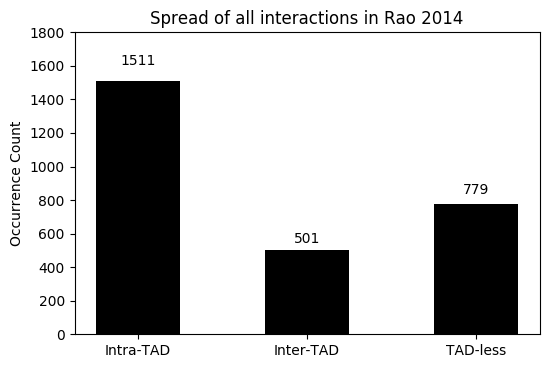

In [52]:
# Basic spread plot
ind = np.arange(3)
vals = np.array([numIntraEP+numIntraN,numInterEP+numInterN,numInvalid])
fig, ax = plt.subplots()
width = 0.5       # the width of the bars
rects1 = ax.bar(ind, vals, width, color='k')
ax.set_ylim([0,1800])
ax.set_xticks(ind)
ax.set_xticklabels(('Intra-TAD', 'Inter-TAD', 'TAD-less'))
ax.set_ylabel('Occurrence Count')
ax.set_title('Spread of all interactions in Rao 2014')

autolabel(rects1)

plt.show()

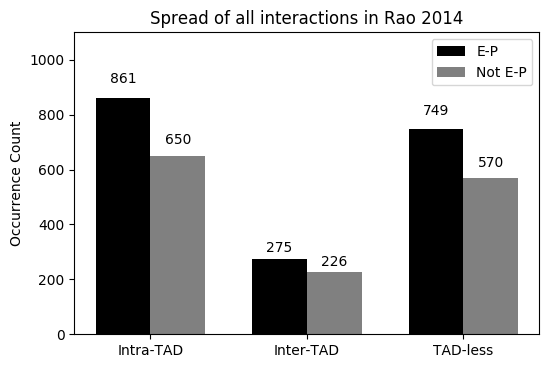

In [67]:
# EP-distinguished spread plot
epVals = np.array([numIntraEP,numInterEP,numTadlessEP])

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
epRects = ax.bar(ind, epVals, width, color='k')

nVals = np.array([numIntraN,numInterN,numTadlessN])
women_std = (3, 5, 2, 3, 3)
nRects = ax.bar(ind + width, nVals, width, color='0.5')

# add some text for labels, title and axes ticks
ax.set_ylim([0,1100])
ax.set_ylabel('Occurrence Count')
ax.set_title('Spread of all interactions in Rao 2014')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Intra-TAD', 'Inter-TAD', 'TAD-less'))

ax.legend((epRects[0], nRects[0]), ('E-P', 'Not E-P'))


autolabel(epRects)
autolabel(nRects)

plt.show()